## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
#import 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

In [3]:
df = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])

# Exploratory Data Analysis (EDA)

Analyze and review the dataframe to better understand its makeup, the columns, datatypes, etc.

In [4]:
pd.set_option('display.max_colwidth', None) #allows us to see the full text of each object column, namely the "address" field
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",47.461975,-122.19052
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",47.711525,-122.35591
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",47.502045,-122.22520
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",47.566110,-122.29020
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",47.532470,-122.07188


In [5]:
#Confirm the data types for each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [6]:
#Look at the 'floors' value counts to determine why its a float
df['floors'].value_counts()

1.0    13962
2.0    12265
1.5     2439
3.0     1222
2.5      222
4.0       30
3.5       15
Name: floors, dtype: int64

In [7]:
#Identify the number of NAs / Nulls (blank)
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [8]:
df['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [9]:
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

Based on the value counts above, the null values can either be kept as is or changed to "Unknown".

# Data Analysis

Here, we begin to analyze the predictors/variables and test out our first linear regression. We start with sqft_living space, as our general assumption is that the bigger the living space, the higher the price of a given house.

In [10]:
x = df[['sqft_living']]
y = df['price']

df_lineartest = sm.OLS(y, sm.add_constant(x)).fit().summary()

df_lineartest

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:59:47   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df_predictors = df.drop(columns=['price'])

<AxesSubplot:>

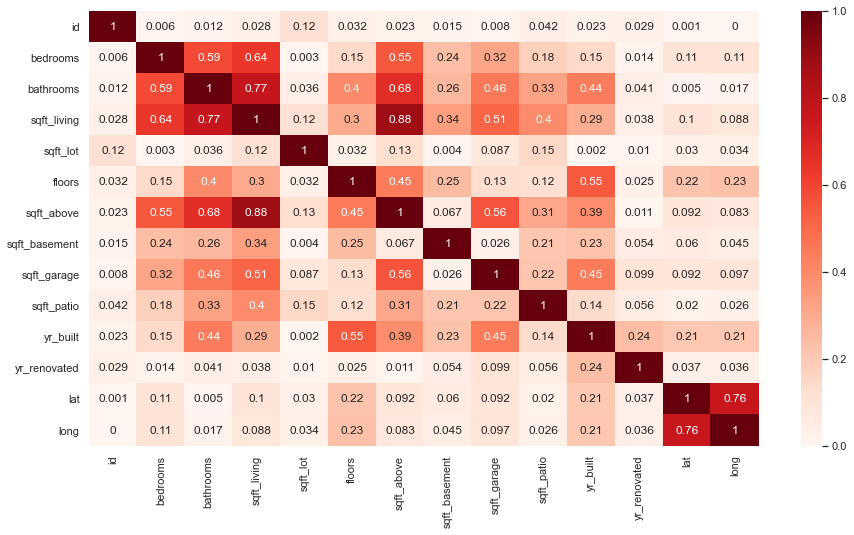

In [12]:
corr = round(abs(df_predictors.corr()),3)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap="Reds", annot=True)


In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [14]:
print (str(df['date'].dddt.date.min()) + ' to ' +str(df['date'].dt.date.max()))

2021-06-10 to 2022-06-09


In [15]:
df['yr_renovated'].value_counts()

0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1942        1
1972        1
1951        1
1930        1
Name: yr_renovated, Length: 83, dtype: int64

In [16]:
print (str(df['date'].dt.date.min()) + ' to ' +str(df['date'].dt.date.max()))

2021-06-10 to 2022-06-09


In [17]:
df = df.drop(columns = ['grade','heat_source','sqft_above','lat','long'])

In [19]:
df['Basement_Binary'] = [1 if sq >  0  else 0 for sq in df['sqft_basement']]

In [20]:
df['Garage_Binary'] = [1 if sq >  0  else 0 for sq in df['sqft_garage']]

In [21]:
df['Patio_Binary'] = [1 if sq >  0  else 0 for sq in df['sqft_patio']]

In [55]:
df['Zip'] = [x.split(',')[2][-5:] for x in df['address']] 
df.head()

#another option to extract zip using regex method df['zip'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,address,Basement_Binary,Garage_Binary,Patio_Binary,Street,City,StateZip,Country,zip,Zip
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,"2102 Southeast 21st Court, Renton, Washington 98055, United States",0,0,1,NaN,NaN,NaN,NaN,98055,98055
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",1,0,1,NaN,NaN,NaN,NaN,11231,98133
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,"8504 South 113th Street, Seattle, Washington 98178, United States",1,0,0,NaN,NaN,NaN,NaN,98178,98178
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",1,1,1,NaN,NaN,NaN,NaN,98118,98118
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",1,1,1,NaN,NaN,NaN,NaN,98027,98027


In [56]:
df['Zip'].value_counts()

98042    992
98038    858
98115    761
98103    760
98117    748
        ... 
99403      1
92250      1
66503      1
68307      1
11369      1
Name: Zip, Length: 400, dtype: int64

We identified and downloaded current listing data from Redfin (source: https://www.redfin.com/county/118/WA/King-County/filter/status=active+contingent+pending,viewport=49.1426:46.25628:-121.23262:-122.89155) and summarize our findings so that we can compare the results of our analysis and modeling of historical sales to what is actually available int he market.

# ATTEMPT TO SCRAPE DATA FROM ZILLOW

In [25]:
from bs4 import BeautifulSoup
import requests

In [26]:
req_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}

with requests.Session() as s:
    html_page = requests.get('https://www.redfin.com/county/118/WA/King-County/filter/status=active+contingent+pending', headers=req_headers)
 

soup = BeautifulSoup(html_page.content, 'html.parser')

In [27]:
html_page

<Response [200]>

In [28]:
dflist2 = pd.DataFrame()
dflist2

""


In [29]:
for i in soup:
    print (i)

html
<html lang="en"><head><!-- Server: phantom-36 --><!-- Time generated: Mon Aug 01 2022 14:00:03 GMT-0700 (Pacific Daylight Time) --><script>(function(a){window.__reactServerOnClickHandler=function(i){(a[i]=a[i]||[]).push(new Date)}})(window.__reactServerUnhandledEvents={})</script><script>
/*! LAB.js (LABjs :: Loading And Blocking JavaScript)
    v2.0.3 (c) Kyle Simpson
    MIT License
*/
!function(t){function e(e){if(t.fetch){var n="The following resources did not resolve within "+p+" ms: "+e,r=JSON.stringify({count:1,errors:[[n]]});t.fetch("/corv/beacon/error",{method:"post",body:"b-"+r})}}function n(t,e){l.push([t,+(e||0),+new Date])}function r(t){var e=/^\w+\:\/\//;return/^\/\/\/?/.test(t)&&(t=location.protocol+t),e.test(t)?t:("/"==t.charAt(0)?a:s)+t}function i(t,r){var i=new Date,o="unknown",c=r,s=setTimeout(function(){e(t.src)},p);r=function(){return clearTimeout(s),n("request_script.byMethod."+o,i),n("request_script.overall",i),c.apply(this,arguments)},setTimeout(function(){

In [30]:
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.11 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9',
'Accept-Encoding': 'identity'
}
#'Accept-Encoding': 'identity'

url = 'https://www.realtor.com/realestateandhomes-search/King-County_WA'

response=requests.get(url,headers=headers)

#print(response.content)

soup=BeautifulSoup(response.content,'html.parser')
price = list(soup.find_all(class_="pc-price"))
price

[]

In [31]:
dflist2['price'] = price

In [32]:
dflist2

,price


use sklearn for getting categorical variables